### Deal with various file formats 

<h5>1. CSV

: CSV는 Comma Seperated Value의 약자로, 쉼표로 구분된 파일을 말한다.

In [1]:
billboardchart = {
  				 1 : ["Tho Box","Roddy Ricch","2019-12-19"],
                 2 : ["Don't Start Now", "Dua Lipa", "2019-11-01"],
                 3 : ["Life Is Good", "Future Featuring Drake", "2020-02-10"],
                 4 : ["Blinding", "The Weeknd", "2019-11-29"],
                 5 : ["Circles", "Post Malone","2019-08-30"]}

with open("billboardchart.csv","w") as f:
    for i in billboardchart.values():
        data = ",".join(i)
        f.write(data+"\n")

print("...")

...


In [2]:
import csv

header = ["title", "singer", "released date"]

with open("billboardchart.csv","r") as inputfile:
    with open("billboardchart_out.csv","w", newline='\n') as outputfile:
        fi = csv.reader(inputfile, delimiter=',')
        fo = csv.writer(outputfile, delimiter=',')
        fo.writerow(header)
        for row in fi:
            fo.writerow(row)

print("...")

...


<h5>1.1 CSV 파일과 Pandas

: 판다스(pandas)의 DataFrame은 to_csv 메서드를 지원한다. 이 메서드를 이용하면 csv 파일로 쉽게 저장할 수 있다.

In [3]:
#- 1. 데이터 준비.
fields = ["title", "singer", "released date"]
rows = [ ["Tho Box","Roddy Ricch","2019-12-19"],
               ["Don't Start Now", "Dua Lipa", "2019-11-01"],
               ["Life Is Good", "Future Featuring Drake", "2020-02-10"],
               ["Blinding", "The Weeknd", "2019-11-29"],
               ["Circles", "Post Malone","2019-08-30"]]

print("...")

...


In [4]:
#- 2. 판다스를 이용해 데이터를 csv 파일로 저장.
import pandas as pd

df=pd.DataFrame(rows, columns=fields)
df.to_csv('pandas.csv',index=False)

print("...")

...


In [5]:
#- 3. 동일한 내용을 csv.writer를 이용해 수행.
import csv 

filename = "test.csv"
with open(filename, 'w+', newline='\n') as csv_file: 
    csv_writer = csv.writer(csv_file) 
    csv_writer.writerow(fields) 
    csv_writer.writerows(rows)

print("...")

...


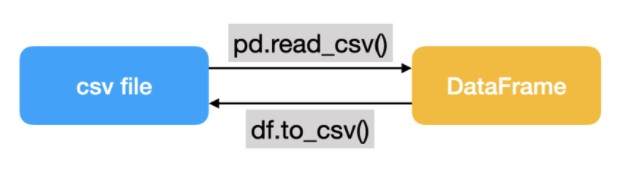

In [9]:
df = pd.read_csv('pandas.csv')
df.head()

,title,singer,released date
0,Tho Box,Roddy Ricch,2019-12-19
1,Don't Start Now,Dua Lipa,2019-11-01
2,Life Is Good,Future Featuring Drake,2020-02-10
3,Blinding,The Weeknd,2019-11-29
4,Circles,Post Malone,2019-08-30


<h5>2. XML

: XML은 Extensible Markup Language의 약자로, 다목적 마크업 언어이다.

<Person>
    <Name>이펠</Name>
    <Age>28</Age>
    <Place>강남</Place>
</Person>

#- 꺾쇠 괄호 안에 태그 이름을 정의하고, 태그 사이에 데이터를 기록하는 형식.
#- 참고로, 태그 이름은 사용자가 마음대로 지정할 수 있음.

In [11]:
<?xml version="1.0" encoding="utf-8"?>
#- XML의 버전과 인코딩을 명시하는 태그입니다. *필수!
<Workbook xmlns="urn:schemas-microsoft-com:office:spreadsheet"
          xmlns:o="urn:schemas-microsoft-com:office"
          xmlns:x="urn:schemas-microsoft-com:excel"
          xmlns:ss="urn:schemas-microsoft-com:spreadsheet"
          xmlns:html="http://www.w3.org/TR/REC-html40">
   <DocumentProperties/>
   <Styles>
      <Style ss:ID="Hyperlink" ss:Name="Hyperlink">
         <Font ss:Color="#0000FF" ss:Underline="Single"/>
      </Style>
      <Style ss:ID="header">
         <Alignment ss:Vertical="Bottom" ss:WrapText="1"/>
         <NumberFormat ss:Format="@"/>
      </Style>
   </Styles>
   <Worksheet ss:Name="notice">
      <Table>
         <Row>
            <Cell>
               <Data ss:Type="String">Notice</Data>
            </Cell>
         </Row>
         <Row/>
         <Row>
            <Cell>
               <Data ss:Type="String">Date generated</Data>
            </Cell>
         </Row>
        

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

: 태그는 기본적으로 <태그> 내용 </태그> 형태로 구성되어 있지만, 아래의 오른쪽 그림처럼 태그에 속성(attribute)값이 포함될 수도 있음.

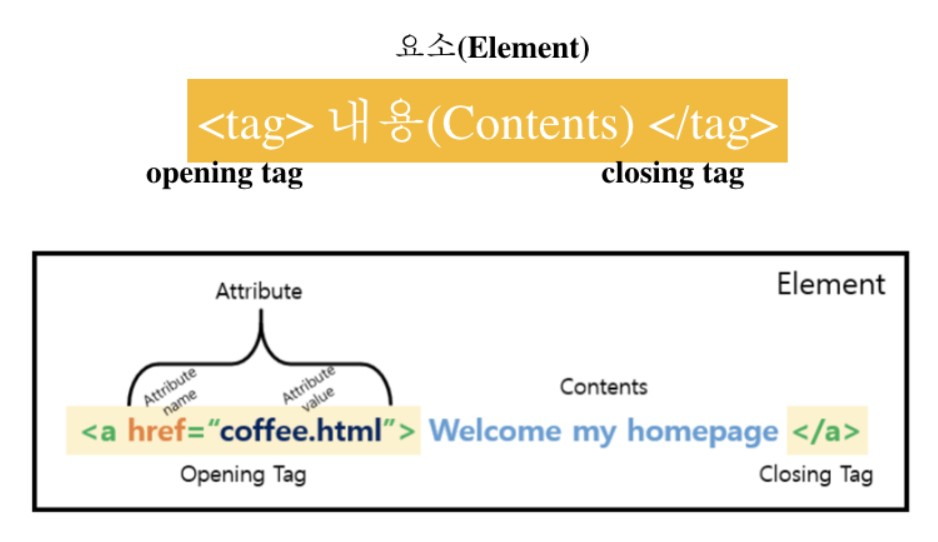

In [ ]:
# 위 예시에서 그림 유형을 찾아보면,
 <Table>
         <Row>
            <Cell>
               <Data ss:Type="String">Notice</Data>
            </Cell>
         </Row>
        
# <Table> 태그는 <Row>, <Cell>, 그리고 <Data> 태그를 자식 태그로 가지고 있다.

* XML은 다목적 마크업 언어(Extensible Markup Language)이다.
* 마크업 언어는 태그(tag)로 이루어진 언어를 말하며, 상위(부모) 태그 - 하위(자식) 태그의 계층적 구조로 되어 있다.
* XML은 요소(element)들로 이루어져 있다.
* 요소는 <열린 태그> 내용 </닫힌 태그>가 기본적인 구조이며, 속성(attribute) 값을 가질 수도 있다.


<h5>2.1 XML 파일 만들기

<h5>2.1.1 ElementTree

: 파이선 표준 라이브러리인 ElementTree는 XML 관련 기능을 다음과 같이 제공한다.

* Element() : 태그 생성
* SubElement() : 자식 태그 생성
* tag : 태그 이름
* text : 텍스트 내용 생성
* attrib : 속성 생성

<h5>2.1.2 dump()

: 생성된 XML 요소 구조를 시스템(sys.stdout)에 사용한다. 출력 형식은 일반 XML 파일로 기록된다.

* write() : XML 파일로 저장
* 리스트(list)와 유사한 메서드를 제공
    * append(), insert(), remove(), pop()

In [17]:
# person XML을 만드는 코드
import xml.etree.ElementTree as ET

person = ET.Element("Person")
name = ET.Element("name")
name.text = "민"
person.append(name)

age = ET.Element("age")
age.text = "29"
person.append(age)

ET.SubElement(person, 'palce').text = '강남'

ET.dump(person)

<Person><name>민</name><age>29</age><palce>강남</palce></Person>


In [18]:
# 속성값은 attrib란 메서드를, name 태그명은 tag메서드를 이용해 변경할 수 있음.
person.attrib["id"] = "0x0001"
name.tag = "firstname"
ET.dump(person)

<Person id="0x0001"><firstname>민</firstname><age>29</age><palce>강남</palce></Person>


In [19]:
# lastname 태그를 firstname 태그 다음으로 삽입하고 속성에 date 추가
lastname = ET.Element('lastname', date = '2022-01-05')
lastname.text = '진원'
person.insert(1, lastname)
ET.dump(person)

<Person id="0x0001"><firstname>민</firstname><lastname date="2022-01-05">진원</lastname><age>29</age><palce>강남</palce></Person>


In [20]:
# 삭제는 remove() or pop() 을 이용.
person.remove(age)

In [21]:
# XML 파일로 저장
ET.ElementTree(person).write('person.xml')

In [22]:
!ls

array.ipynb			      pandas.csv
billboardchart.csv		      person.xml
billboardchart_out.csv		      __pycache__
break_continue.ipynb		      README.md
directory_file.ipynb		      reducing_code.ipynb
for.ipynb			      string_data.ipynb
for_try_except_multiprocessing.ipynb  test.csv
hello.txt			      Untitled1.ipynb
mycalculator.py			      Untitled.ipynb
numpy1.ipynb			      various_file_formats.ipynb
numpy2.ipynb			      while.ipynb


<h5>2.2 XML 파싱하기

: 파싱(parsing, 구문 분석)이란 어떤 문자열을 의미 있는 토큰(token)으로 분해해, 문법적 의미와 구조를 반영한 파스 트리(parse tree)를 만드는 과정이다. XML 문서를 파싱하게 되면 특정 태그명이나 속성값 등을 불러올 수 있다.

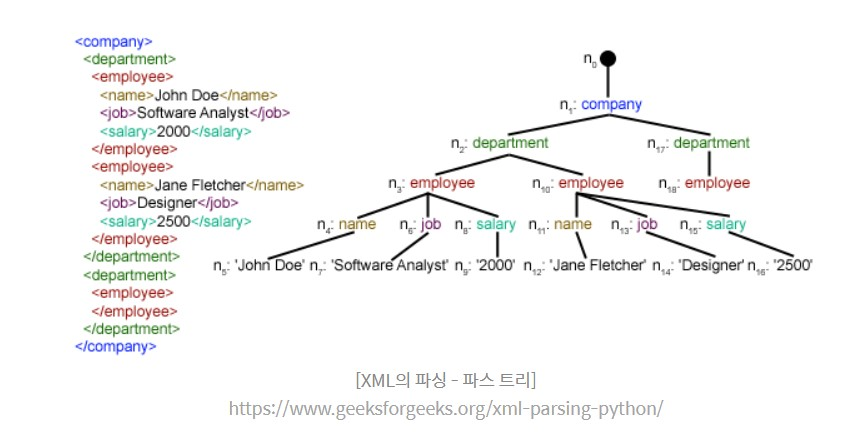

파이썬에서는 파싱 방법으로 크게 2가지를 제공한다.
<br/>
1.ElementTree
<br/>
2.BeautifulSoup 라이브러리 사용

<h5>2.2.1 설치

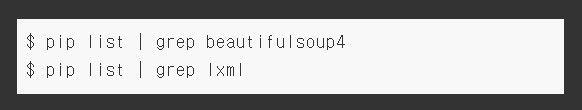

<h5>2.2.2 books.xml 파일의 "title" 태그의 내용만 가져오기

* 예제 파일 : [books.xml](https://docs.microsoft.com/en-us/previous-versions/windows/desktop/ms762271(v%3Dvs.85))

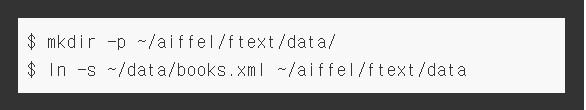

In [ ]:
from bs4 import BeautifulSoup
import os

path = os.getenv("HOME") + "/aiffel/ftext/data/books.xml"  # 로컬을 사용하시려면 경로는 수정해 주세요. 
with open(path, "r", encoding='utf8') as f:
    booksxml = f.read() 
    #- 파일을 문자열로 읽기
 
soup = BeautifulSoup(booksxml,'lxml') 
#- BeautifulSoup 객체 생성 : lxml parser를 이용해 데이터 분석

for title in soup.find_all('title'): 
#-  태그를 찾는 find_all 함수 이용
    print(title.get_text())

[BeautifulSoup 메서드](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#parsing-xml)

<h5>3. JSON

: SON은 JavaScript Object Notation의 약자로, 웹 언어인 JavaScript의 데이터 객체 표현 방식이다. 웹 브라우저와 다른 애플리케이션 사이에서 HTTP 요청으로 데이터를 보낼 때 널리 사용하는 표준 파일 포맷 중 하나로, XML과 더불어 웹 API나 config 데이터를 전송할 때 많이 쓰인다.

In [ ]:
# JSON 데이터의 예시
person = {
      "first name" : "Yuna",
      "last name" : "Jung",
      "age" : 33,
      "nationality" : "South Korea",
      "education" : [{"degree":"B.S degree", "university":"Daehan university", "major": "mechanical engineering", "graduated year":2010}]
       } 

얼핏 보아도 파이썬의 dictionary 타입과 매우 유사한 구조를 가지고 있다. CSV 파일에 비해 조금 더 유연하게 데이터를 표현할 수 있고, XML 파일보다 파일을 쉽게 읽고 쓸 수 있다는 장점이 있다. 뿐만 아니라 Javascript로 작성된 프로그램에서 쉽게 다룰 수 있다.

<h5>3.1 JSON 파싱

<h5>3.1.1 JSON 파일 저장

: 파이썬 dictionary 타입은 JSON으로 저장할 수 있다.

In [24]:
# 위 예시로 보인 person이라는 dict 객체를 JSON 파일로 저장
import json

person = {
    "first name" : "Jinwon",
    "last name" : "Min",
    "age" : "29",
    "nationality" : "South Korea",
    "education" : [{"degree":"B.S degree", "university":"Daehan university", "major": "mechanical engineering", "graduated year":2010}]    
}

with open("person.json", "w") as f:
    json.dump(person, f)
    
print(...)

Ellipsis


<h5>3.1.2 JSON 파일 읽기

In [25]:
# JSON 파일의 내용을 파이썬 dict 객체로 쉽게 읽어들일 수 있음.
import json

with open("person.json", "r", encoding="utf-8") as f:
    contents = json.load(f)
    print(contents["first name"])
    print(contents["education"])

Jinwon
[{'degree': 'B.S degree', 'university': 'Daehan university', 'major': 'mechanical engineering', 'graduated year': 2010}]
